In [71]:
# library
import matplotlib.pyplot as plt
import datetime
import yfinance as yf


In [72]:
"""
Defining some constants for data mining
"""
NUM_DAYS = 10000     # The number of days of historical data to retrieve
INTERVAL = '1d'     # Sample rate of historical data
#symbol = 'AAPL'     # Symbol of the desired stock

# List of symbols for technical indicators
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'BASP', 'PIVOT_FIB', 'VORTEX']

"""
Pull the historical data using yfinance
Rename the column names because finta uses the lowercase names
"""

start = "2015-01-01"
end = datetime.datetime.today()

aapl = yf.download('AAPL', start = start, end = end, interval = INTERVAL)

aapl.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,178.440002,76468400
2022-04-05,177.500000,178.300003,174.419998,175.059998,175.059998,73401800
2022-04-06,172.360001,173.630005,170.130005,171.830002,171.830002,89058800
2022-04-07,171.160004,173.360001,169.850006,172.139999,172.139999,77517700
2022-04-08,171.779999,171.770004,169.220001,169.900101,169.900101,50699182


In [73]:
symbol = "aapl"
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'AAPL')

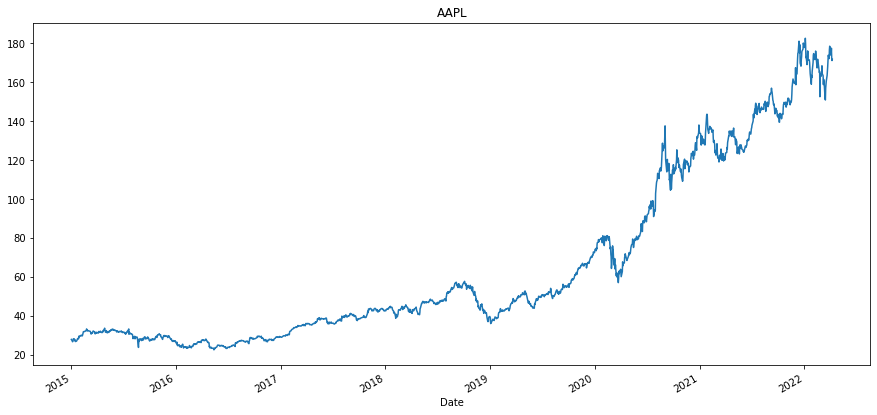

In [103]:

df['Open'].plot(label = 'appl', figsize = (15,7))
plt.title(symbol)


<AxesSubplot:xlabel='Date'>

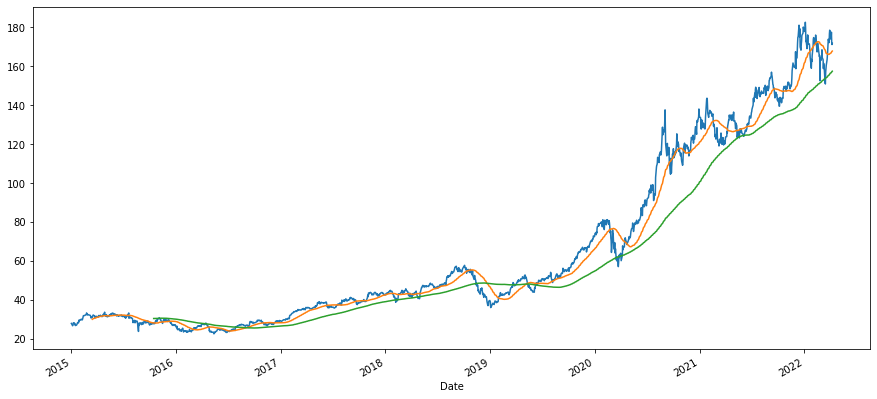

In [75]:
# moving average 50, 200

df['MA50'] = df['Open'].rolling(50).mean()
df['MA200'] = df['Open'].rolling(200).mean()
df['Open'].plot(figsize = (15,7), label="price")
df['MA50'].plot(label="MA50")
df['MA200'].plot(label="MA200")

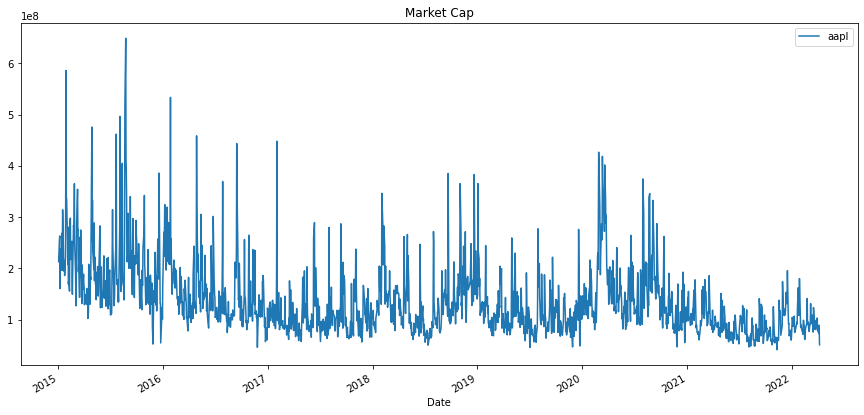

In [77]:
# volume
df['Volume'].plot(label = 'aapl', figsize = (15,7))
df['MarktCap'] = df['Open'] * df['Volume']
plt.title('Market Cap')
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

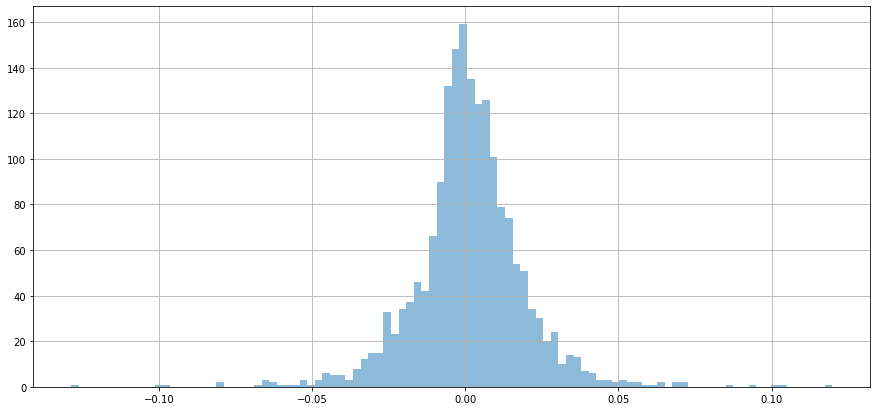

In [76]:
# volatility

df['returns'] = (df['Close']/df['Close'].shift(1)) -1
df['returns'].hist(bins = 100, label = symbol, alpha = 0.5, figsize = (15,7))
plt.legend